In [132]:
import csv
from statistics import mode
import re
from collections import Counter

good_messages = []
bad_messages = []

good_bag = []
bad_bag = []

with open('train.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    bad_index = 0
    good_index = 0

    for rows in csv_reader:
        if(rows[1] == '1'):
            bad_messages.append(rows[2])
            if(len(bad_messages[bad_index].split(' ')) > 1):
                for message in bad_messages[bad_index].split(' '):
                    bad_bag.append(message)
            else:
                bad_bag.append(bad_messages[bad_index])
            bad_index+=1
        else:
            good_messages.append(rows[2])
            if(len(good_messages[good_index].split(' ')) > 1):
                for message in good_messages[good_index].split(' '):
                    good_bag.append(message)
            else:
                good_bag.append(good_messages[good_index])
            good_index+=1

# Separando os casos de treino entre bons e ruins
regex = re.compile(r'(\@\buser\b)|([\d]+)|(\s)|\'\'|$|([\w*]{1,2}|\&\bamp\b)')

filtered_bad = [i for i in bad_bag if not regex.match(i)]
filtered_good = [i for i in good_bag if not regex.match(i)]


bad_most_used = mode(filtered_bad)
indices_bad = [i for i, x in enumerate(filtered_bad) if x == bad_most_used]

good_most_used = mode(filtered_good)
indices_good = [i for i, x in enumerate(filtered_good) if x == good_most_used]

good_bag = list(set(good_bag) - set(bad_bag))
bad_bag = list(set(bad_bag) - set(good_bag))

print("BAD MOST USED:", bad_most_used, len(indices_bad))
print("GOOD MOST USED:", good_most_used, len(indices_good))
print(len(bad_bag), "BAD")
print(len(good_bag), "GOOD")

BAD MOST USED: #trump 119
GOOD MOST USED: #love 1439
8217 BAD
58951 GOOD


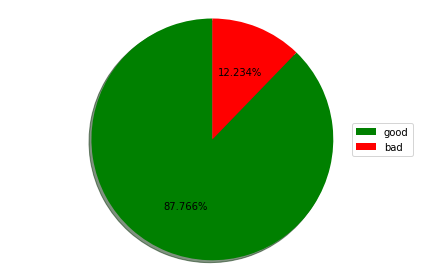

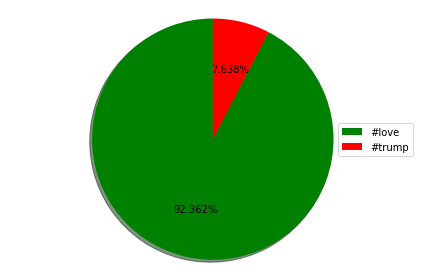

In [136]:
import matplotlib.pyplot as plt


def plot(labels, sizes):
    colors = ['green', 'red']
    explode = (0.1, 0,)
    patches, texts, pct = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.3f%%')
    plt.legend(patches, labels, loc="right")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

message_data = {"labels": ['good', 'bad'], "sizes": [len(good_bag), len(bad_bag)]}
plot(message_data["labels"], message_data["sizes"])
occurrence_data = {"labels": ['#love', "#trump"], "sizes": [len(indices_good), len(indices_bad)]}
plot(occurrence_data["labels"], occurrence_data["sizes"])


# Melhor Visualização dos dados

# Análise Exploratória dos Dados

## Extração de dados importantes

Primeiramente, antes de se analisar os dados, é necessário filtra-los. Para isso foram ignoradas palavras com menos de 2 caracteres, digitos, "&amp" e "@user". Tal conjunto foi ignorado por não ter um grande valor no contexto que está em análise neste trabalho. Após este filtro, obtivemos os seguintes dados:


| Palavras sem Discurso de ódio | Palavras com Discurso de Ódio | Total |
|:--------------------:|:--------------------:| :---: |
|       58951          |        8217          | 67168 |
|       87.766%        |        87.766%       | 100%  |

Além dos dados numéricos encontrados, também é necessário analisar que, segundo o artigo "A Study on Detecting Patterns in Twitter Intra-topic User and Message Clustering" de Marc Cheong e Vincent Lee, uma das características importantes para análize de tweets é o tema das "hashtags" para ter um conjunto temático melhor a ser analizado.

Após a divisão dos dados foi extraida a moda de cada conjunto sendo elas: "#trump" com 119 ocorrências para tweets com discurso de ódio e #love com 1439 ocorrências para tweets sem discurso de ódio. Esses dados são importantes para avaliar futuros pesos dessas mesmas palavras num outro contexto. 

Depois de separar as palavras de cada tweet e organizá-las entre "boas" e "más", será utilizada a "feature hashing" para que, com a separação de palavras, possa haver uma melhor determinação de quais tweets são de natureza maliciosa e quais não são.


In [16]:
import numpy as np
import random
class Neural_Network:
    def __init__(self, 
                 nmb_of_hidden_nodes,
                 nmb_of_in_nodes,
                 nmb_of_out_nodes,
                 learning_rate):
        self.nmb_of_hidden_nodes = nmb_of_hidden_nodes
        self.nmb_of_in_nodes = nmb_of_in_nodes
        self.nmb_of_out_nodes = nmb_of_out_nodes
        self.generate_weights_and_bias()
        
    def generate_weight(self):
        for _ in self.nmb_of_hidden_nodes
            # rand for bias
            for _ in self.nmb_of_in_nodes:
                self.weight_hidden.append(rand.uniform(1, 5000))
        for _ in self.nmb_of_out_nodes:
            # rand bias
            for _ in self.nmb_of_hidden_nodes:
                self.weight_out.append(rand_uniform(1,5000))
            
    def train(list_train, should_be):
        e = 0
        for j in range(10_000):
            for index in range(len(list_train)):
                it_is = feed_forward(list_train[index])
                e = np.linalg.norm(it_is - should_be)
                self.error += e
            mean_error = self.error / len(list_train)
            if self.error < 0.2:
                break
            back_propagation(self)
            
    
    def test(list_test):
        pass
    
    def feed_forward(self, train_case):
        pass
    
    def back_propagation(self):
        pass